# Bank Customer Churn Prediction

**Introduction**:

Customer churn, refers to the phenomenon where customers stop doing business with a company.In the banking sector, churn prediction is a critical challenge, as acquiring a new customer often costs significantly more than retaining an existing one. By accurately predicting which customers are likely to leave, banks can take proactive measures such as offering personalized services, incentives, or targeted retention campaigns.

In this project, we aim to develop a Bank Customer Churn Prediction Model using historical customer data. We use a dataset containing 10,000 bank customer records with features such as:
*   **Demographics:** Country, Gender, Age
*   **Account Information:** Credit Score, Tenure, Number of Products, Balance
*   **Engagement Indicators:** Credit Card ownership, Active Membership status
*   **Financial Data:** Estimated Salary
*   **Target Variable:** Churn (1 = customer left, 0 = customer stayed)

Our goal is to:
1. Explore the data to identify patterns and key churn drivers.
2. Build machine learning models to predict which customers are likely to churn.

By developing a robust churn prediction model, the bank can proactively identify at-risk customers, personalize engagement strategies, and ultimately strengthen customer loyalty.




**Importing all the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Data Sets/Bank Customer Churn Prediction.csv')

Exploring and Understanding the Data

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


*   The dataset contains 10,000 rows and 12 columns.
*   All columns have complete data — there are no missing values.
*   The dataset includes:
  *  Numerical features: credit_score, age, tenure, balance, products_number, estimated_salary, etc.
  *   Categorical features: country, gender.
  *   Target variable: churn (binary: 0 = stayed, 1 = left).

  Since there are no missing values in the dataset, we can skip the data cleaning step.



# EDA

In [ ]:
churn_count= df['churn'].value_counts()

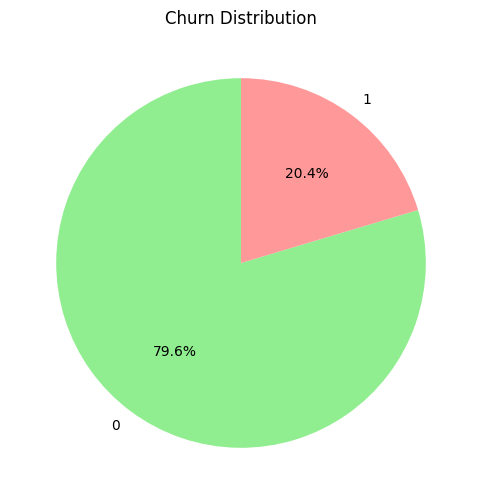

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=90,colors=['#90EE90', '#FF9999'])
plt.title("Churn Distribution")
plt.show()

Although most customers have not churned, the 20% attrition rate remains significant for the banking sector, as losing one-fifth of the customer base can severely impact revenue.

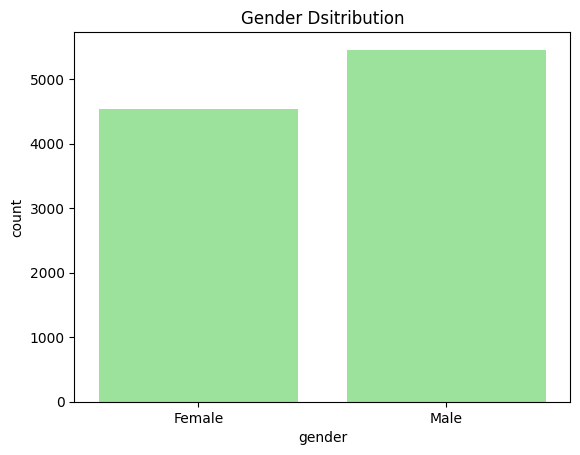

In [ ]:
sns.countplot(x='gender',data=df, color='#90EE90')
plt.title('Gender Dsitribution')
plt.show()

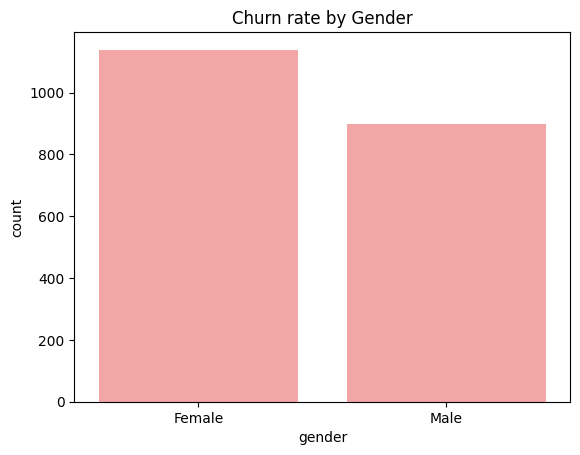

In [ ]:
sns.countplot(x='gender',data=df[df['churn']==1], color='#FF9999')
plt.title('Churn rate by Gender')
plt.show()

*   The dataset contains slightly more male customers than female customers.
*   A higher number of female customers have churned compared to males, even though females are fewer in total.
*   This indicates that female customers have a proportionally higher churn rate than male customers.
*   The bank may need to investigate factors driving higher churn among female customers, such as differences in service satisfaction, product relevance, or engagement strategies, and tailor retention efforts accordingly.





In [ ]:
df['Age_Group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100],
                         labels=['18-30','31-40','41-50','51-60','60+'])

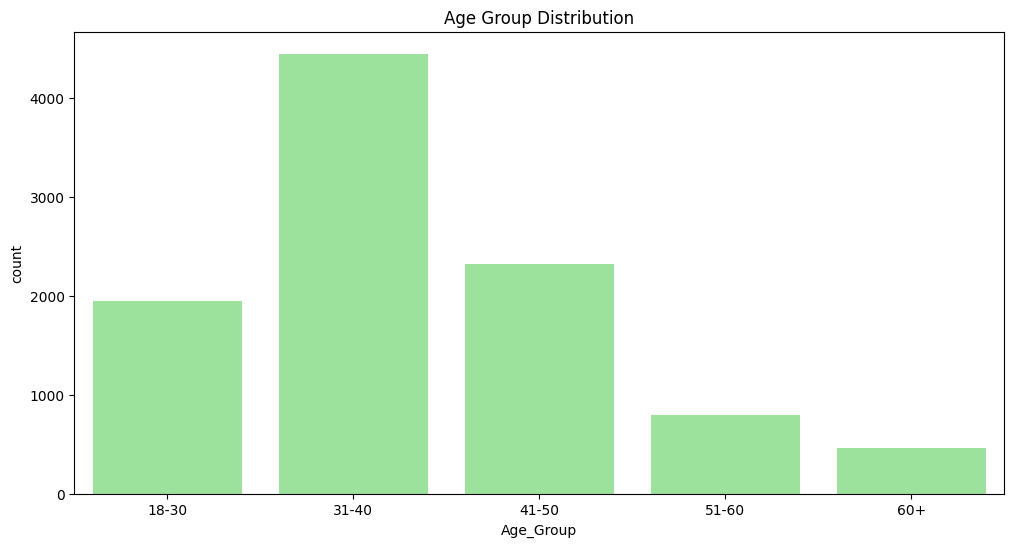

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_Group', data=df,color='#90EE90')
plt.title("Age Group Distribution")
plt.show()

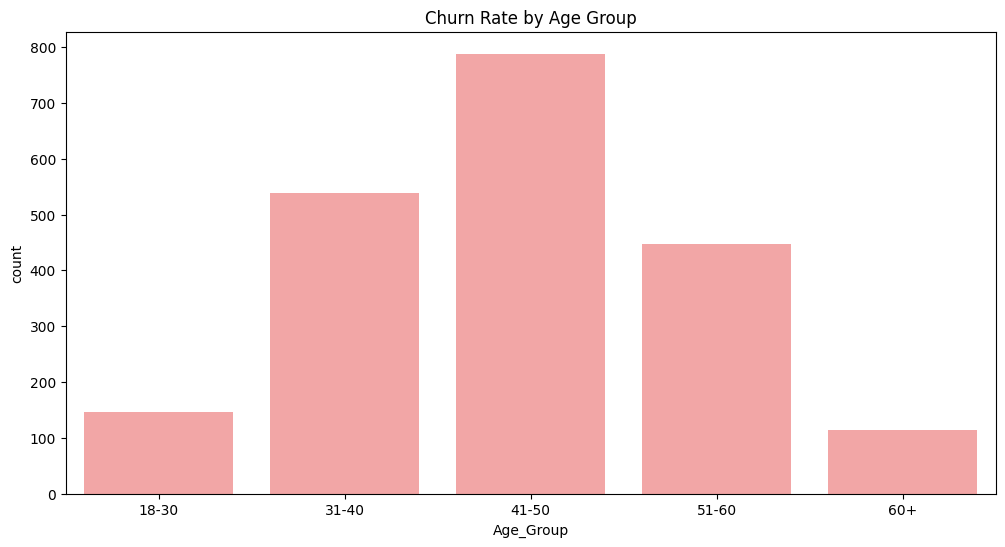

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_Group', data=df[df['churn']==1],color='#FF9999')
plt.title("Churn Rate by Age Group")
plt.show()

*   Age Group Distribution
  *   The largest segment of customers is in the 31–40 age group, followed by 41–50.
  *   The smallest customer base is 60+
*   Churn Rate by Age Group
  *  The 41–50 age group has the highest churn count, despite not being the largest group.
  *   The 31–40 age group also shows a relatively high churn count.
  *   The 18–30 and 60+ groups have the lowest churn counts.

Middle-aged customers, especially those between 41–50, are at the highest risk of leaving. The bank should investigate why this demographic is more prone to churn—possible reasons could include dissatisfaction with services, better offers from competitors, or changing financial needs—and design tailored retention campaigns for them.







In [ ]:
df['Balance_Category'] = pd.cut(df['balance'], bins=[-1, 50000, 100000, 150000, 200000, df['balance'].max()],
                                labels=['0-50000','50001-100000','100001-150000','150001-200000','200001 and above'])

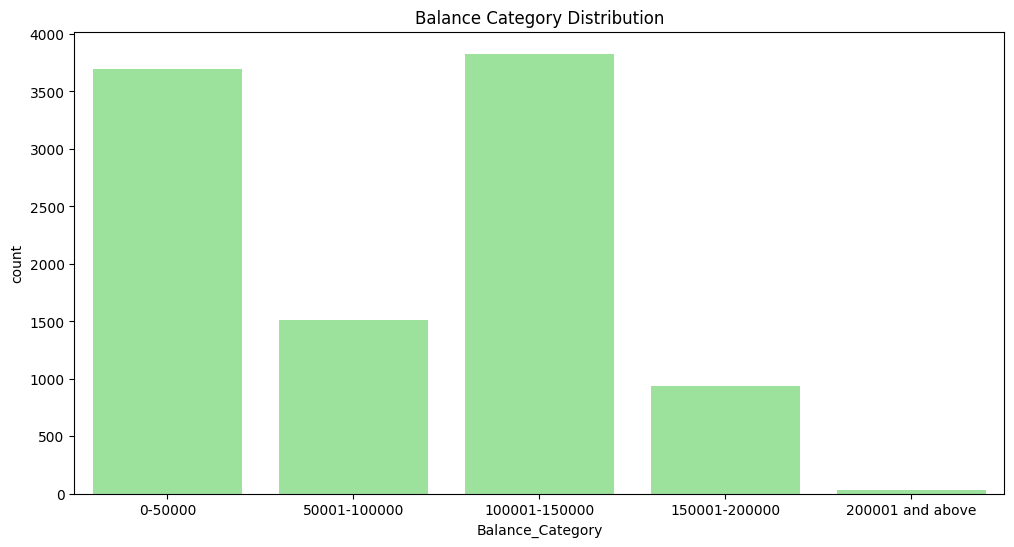

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Balance_Category', data=df,color='#90EE90')
plt.title("Balance Category Distribution")
plt.show()

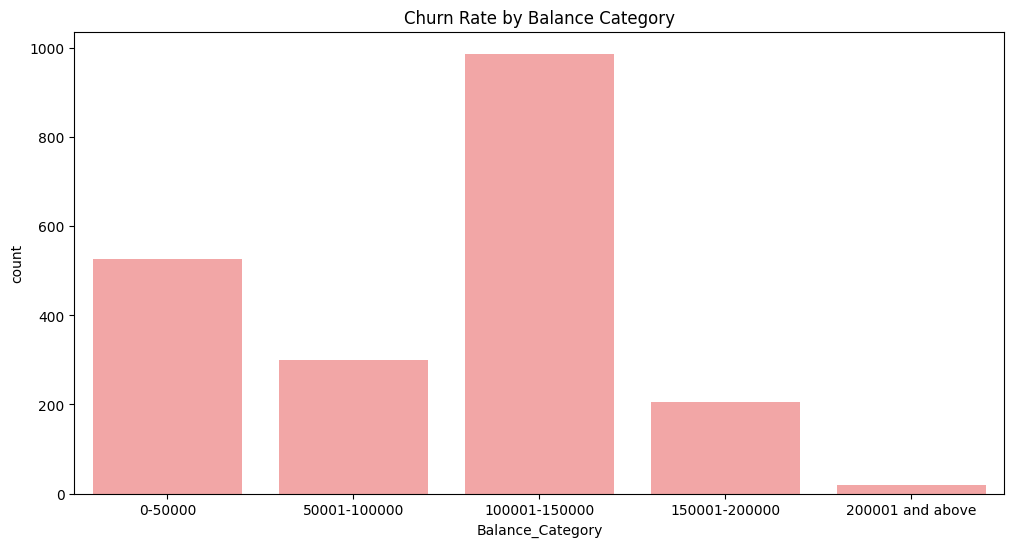

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Balance_Category', data=df[df['churn']==1],color='#FF9999')
plt.title("Churn Rate by Balance Category")
plt.show()

*   Balance Category Distribution
  *   The two largest customer groups fall into:
          *   $0–50,000 range
          *   $100,001–150,000 range
  *   Very few customers have balances above $200,000.

*   Churn Rate by Balance Category
  *   The highest churn count is in the $100,001–150,000 category.
  
  *   The $0–50,000 group also has a significant number of churn cases, though less than the peak category.
  *   Higher balance categories show lower churn counts, possibly indicating stronger engagement or loyalty.
  
Customers with moderate account balances (₹100k–150k) are at the greatest risk of churn. This could be because they have enough funds to be attractive to competing banks but may feel their current bank is not offering competitive benefits. Banks could target this segment with personalized financial products, higher interest rates, or loyalty perks to retain them.







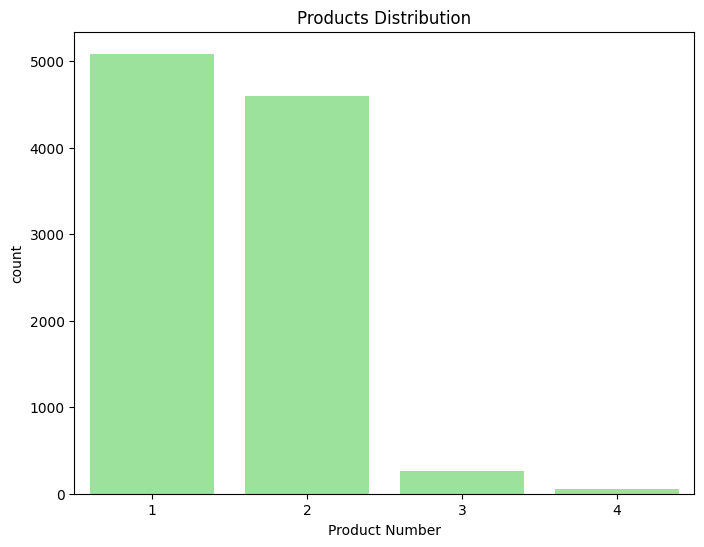

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='products_number', data=df, color='#90EE90')
plt.title("Products Distribution")
plt.xlabel("Product Number")
plt.show()

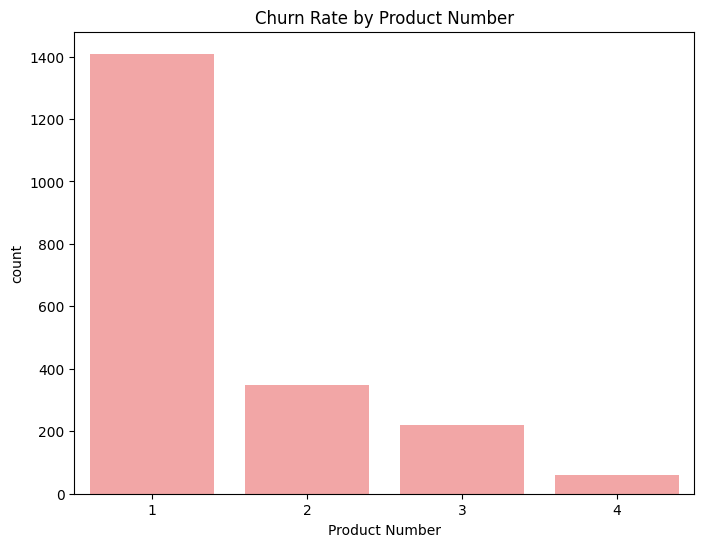

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='products_number', data=df[df['churn']==1], color='#FF9999')
plt.title("Churn Rate by Product Number")
plt.xlabel("Product Number")
plt.show()

**Products Distribution:**
* Product 1 is the most widely held product among customers.
* Product 2 is also popular but slightly less so.
* Products 3 and 4 are much less frequently held.

**Churn Rate by Product Number:**
* Product 1 is associated with the highest churn — significantly more than others.
* Product 2 has noticeably lower churn.
* Products 3 and 4 have very low churn counts, though their customer base is also much smaller.

In [ ]:
df['CreditScore_Category'] = pd.cut(df['credit_score'],
                                    bins=[0, 550, 650, 700, 750, 850],
                                    labels=['550 and Below', '551-650', '651-700', '701-750','751 and above'])

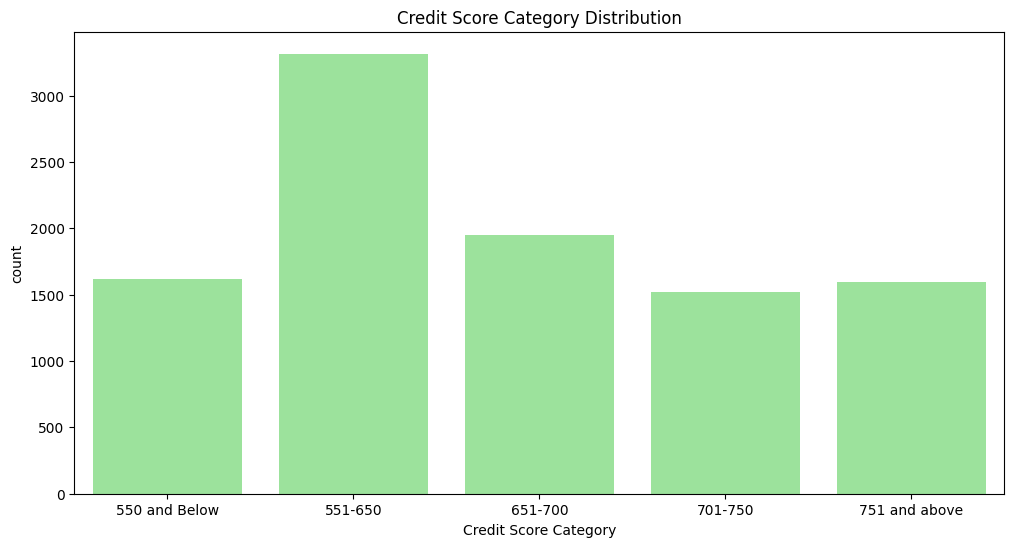

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='CreditScore_Category', data=df,color='#90EE90')
plt.title("Credit Score Category Distribution")
plt.xlabel("Credit Score Category")
plt.show()

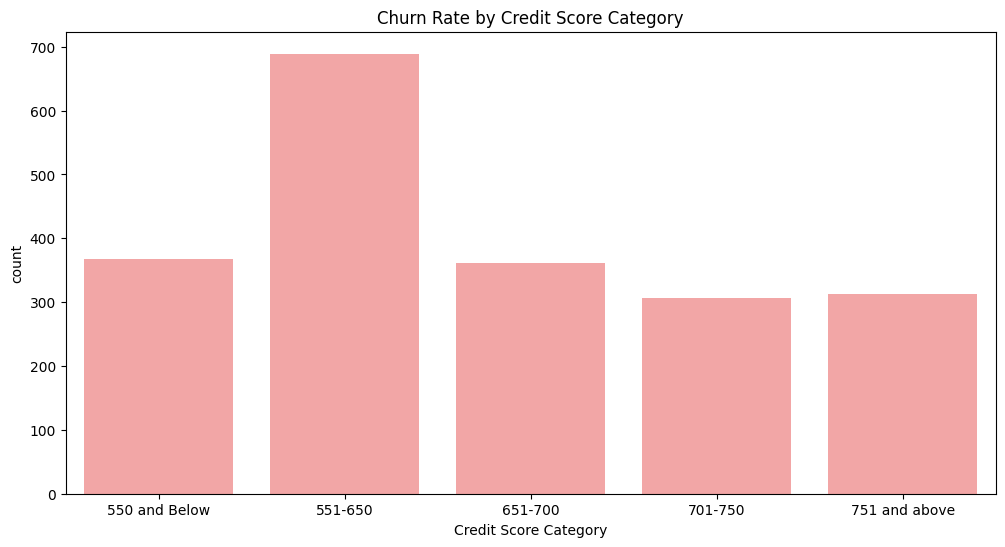

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='CreditScore_Category', data=df[df['churn']==1],color='#FF9999')
plt.title("Churn Rate by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.show()

*   Credit Score Category Distribution
  *   Most customers fall in the 551–650 range, making it the largest segment.
  *   The 651–700 range is the second largest, followed by 550 and below and 751+ categories, which have similar counts.
  *   The 701–750 range is the smallest group.
*   Churn Rate by Credit Score Category
  *   The highest absolute number of churners comes from the 551–650 category — consistent with it being the largest group, but also possibly indicating a higher churn risk in this range.
  *   550 and below and 651–700 categories also have significant churn counts.
  *   701–750 and 751+ categories have the lowest churn counts, which suggests higher credit scores might correlate with lower churn rates.

*   There’s a negative correlation between credit score and churn risk — customers with higher credit scores tend to churn less.

*   However, the 551–650 group is both the largest in size and the largest contributor to churn, making it a critical segment for retention efforts.






In [ ]:
bin_width=50000

bins = np.arange(0, 200000 + bin_width, bin_width)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]


df['Salary_Range'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, include_lowest=True)

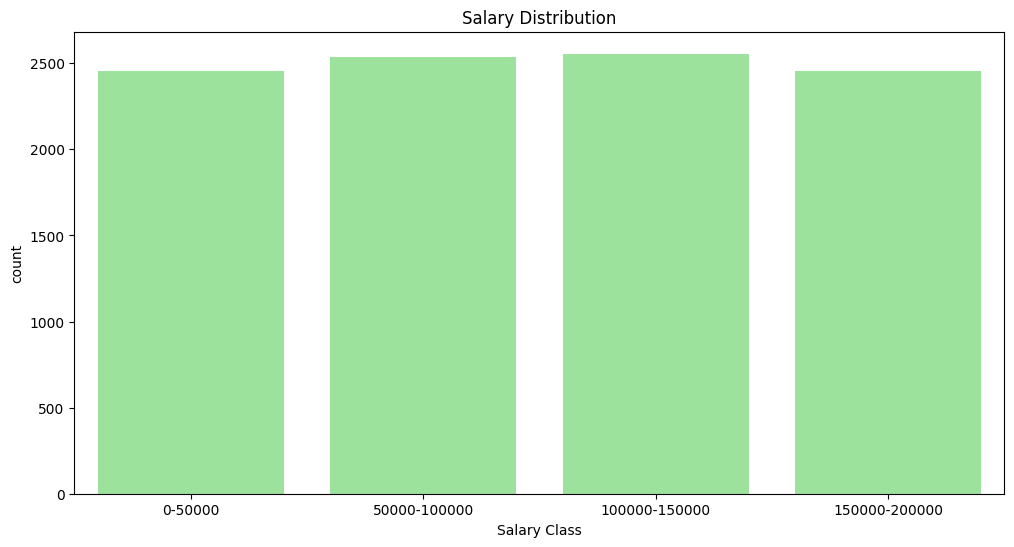

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Salary_Range',data=df, color='#90EE90')
plt.title('Salary Distribution')
plt.xlabel('Salary Class')
plt.show()

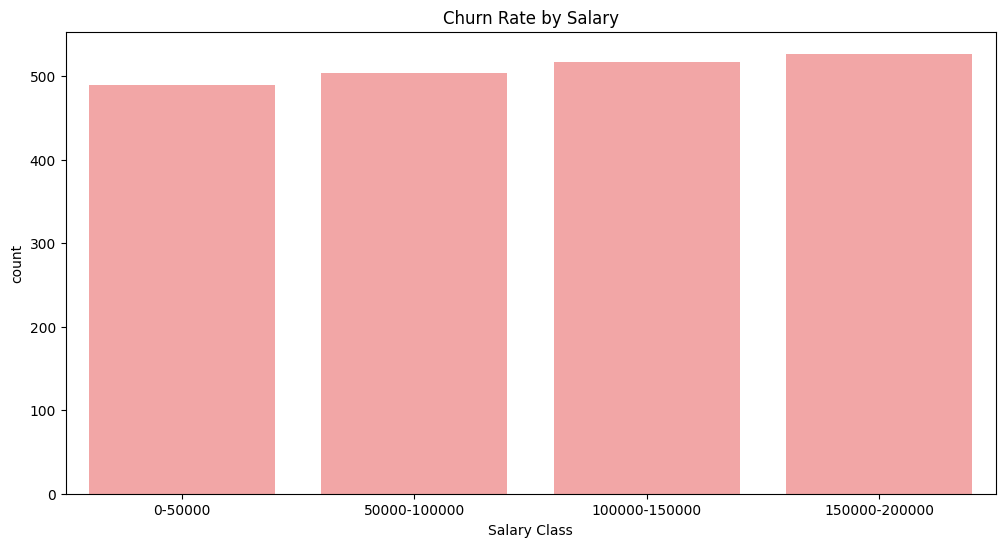

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Salary_Range',data=df[df['churn']==1], color='#FF9999')
plt.title('Churn Rate by Salary')
plt.xlabel('Salary Class')
plt.show()

*   Salary Distribution
  *   Customers are fairly evenly distributed across the four salary brackets
  *   Each bracket has roughly the same number of customers
*   Churn Rate by Salary
  *   The number of customers who churned is also relatively stable across all salary classes.
  *   There is a slight increase in churn as salary increases, with the highest churn rate in the $150000–200000 bracket.


*   Churn is not strongly correlated with salary — customers across all income levels are churning at similar rates.
*   Interestingly, higher-income customers (150000–200000) show slightly higher churn.This could indicate:
  *   They have more options and are less loyal to one bank.
  *   They might expect premium services and switch if expectations aren't met.








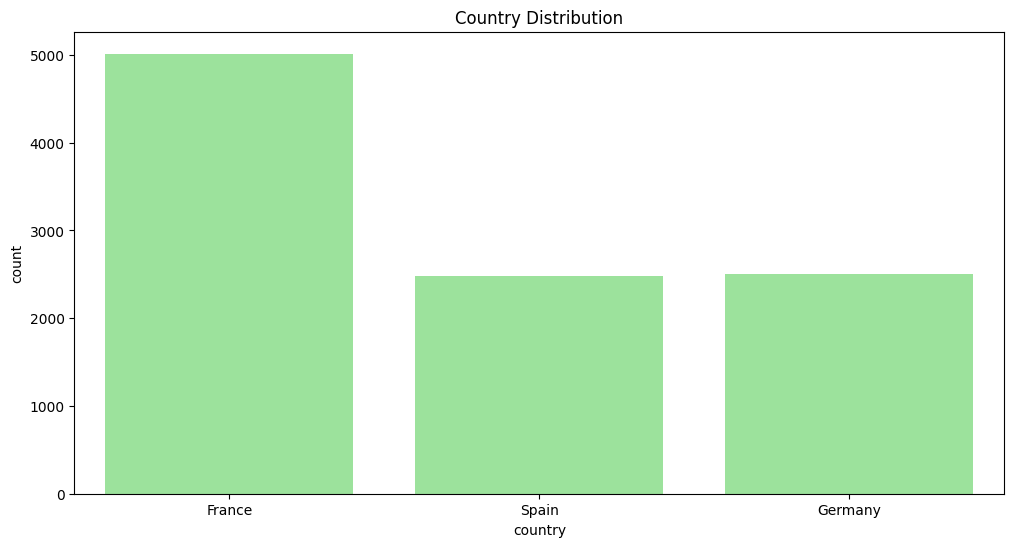

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df,color='#90EE90')
plt.title("Country Distribution")
plt.show()

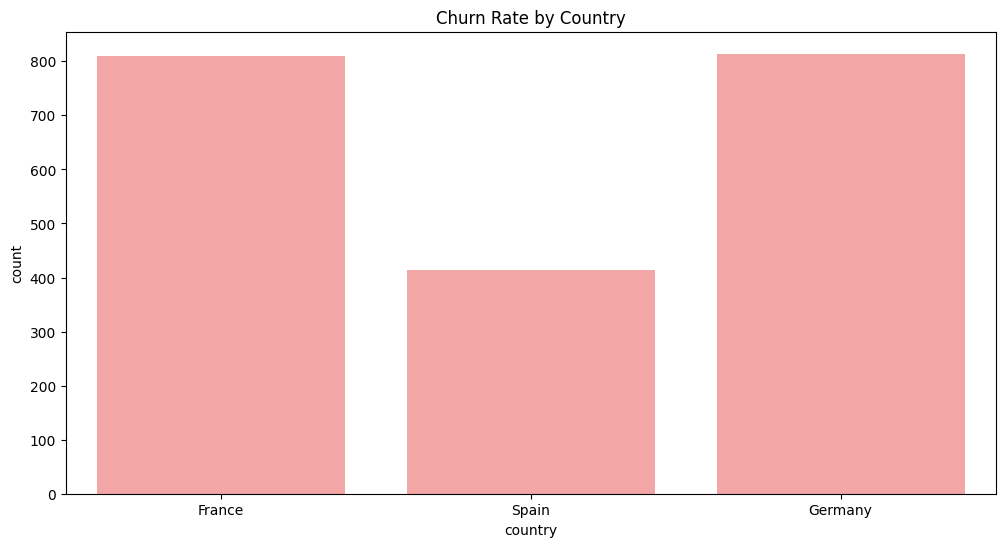

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df[df['churn']==1],color='#FF9999')
plt.title("Churn Rate by Country")
plt.show()

*   Country Distribution
  *   France has the largest customer base, followed by Spain and Germany equally.

*   Churn Rate by Country
  *   While France and Germany have the same number of churned customers, France has twice as many customers as Germany.
*   Germany has the highest churn rate: Although it has fewer customers than France, it has the same number of churned customers. This implies a much higher churn proportion in Germany.
*   France has a moderate churn rate: High number of customers and high churn count, but the churn proportion is lower compared to Germany.
*   Spain has the lowest churn rate: Fewer total customers and significantly fewer churned customers. Indicates greater customer retention in Spain.








# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

In [ ]:
df.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'Age_Group', 'Balance_Category', 'CreditScore_Category',
       'Salary_Range', 'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['customer_id', 'churn','Age_Group','Balance_Category','CreditScore_Category','Salary_Range'])
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay

In [ ]:
log_reg = LogisticRegression(random_state=42,solver='liblinear')
parameters = {'max_iter': list(range(200, 1001, 100))}

LogisticRegression_Classifier = GridSearchCV(
    estimator=log_reg,
    param_grid=parameters,
    n_jobs=-1,
    verbose=1
)

LogisticRegression_Classifier.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'max_iter': [200, 300, 400, 500, 600, 700, 800, 900,
                                      1000]},
             verbose=1)

In [ ]:
best_log_reg_model = LogisticRegression_Classifier.best_estimator_
y_train_predicted = best_log_reg_model.predict(X_train_scaled)
y_predicted_log_reg = best_log_reg_model.predict(X_test_scaled)
best_log_reg_params = LogisticRegression_Classifier.best_params_

print("Best parameters are " , best_log_reg_params)

Best parameters are  {'max_iter': 200}


Logistic Regression Report:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix Report:


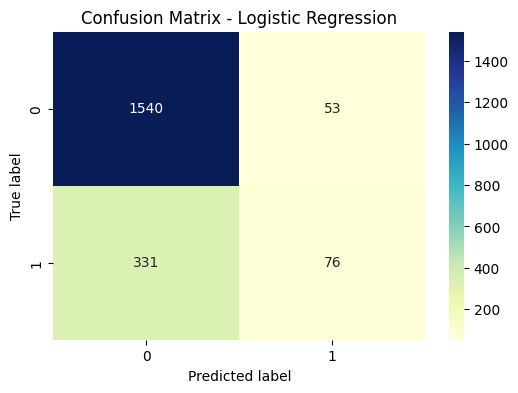

In [ ]:
print("Logistic Regression Report:")
print("Classification Report:")
print(classification_report(y_test, y_predicted_log_reg))
print("Confusion Matrix Report:")
cm = confusion_matrix(y_test, y_predicted_log_reg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Logistic Regression**
*   The model achieved 81% overall accuracy, indicating it predicts the majority of cases correctly.
*   For Non-Churners:
  *   Precision = 0.82, Recall = 0.97
  *   The model almost never mislabels loyal customers as churners.
  *   Very strong performance in identifying customers who will stay.
*   For Churners :
  *   Precision = 0.59 — When the model predicts churn, it's correct only 59% of the time.
  *   Recall = 0.19 — It detects just 19% of actual churners, missing 81% of them.
*   While the model performs well at recognizing customers who are likely to stay, its low recall for churners is a serious issue in churn prediction.









# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(
    estimator=rfc,
    param_grid=parameters,
    n_jobs=-1,
    verbose=1,
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [ ]:
best_rfc_model = rf_grid.best_estimator_
y_train_predicted = best_rfc_model.predict(X_train)
y_predicted_rfc = best_rfc_model.predict(X_test)
best_rfc_params = rf_grid.best_params_
print("Best parameters are:", best_rfc_params)

Best parameters are: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


Random Forest Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Random Forest Confusion Matrix:


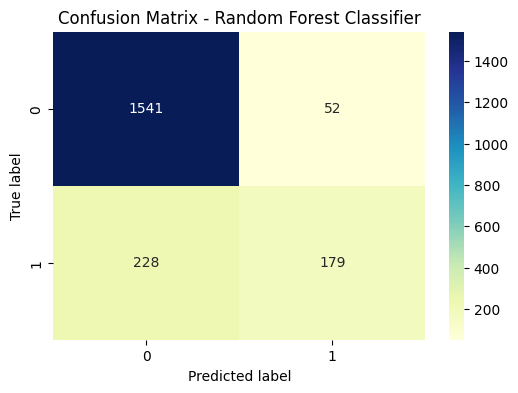

In [ ]:
print("Random Forest Report:")
print(classification_report(y_test, y_predicted_rfc))
print("Random Forest Confusion Matrix:")
cm_rfc = confusion_matrix(y_test, y_predicted_rfc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='YlGnBu', linewidths=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

**Random Forest Classifier**
*   The model achieved 86% overall accuracy, showing good general performance in predicting customer churn outcomes.
*   For Non-Churners:
  *   Precision = 0.87, Recall = 0.97
  *   The model rarely misclassifies loyal customers as churners.
  *   Very strong at identifying customers who are likely to stay.
*   For Churners:
  *   Precision = 0.77 — When the model predicts a customer will churn, it’s correct 77% of the time.
  *   Recall = 0.44 — It successfully identifies 44% of actual churners, missing 56% of them.


The main goal in churn prediction is not just accuracy, but catching as many churners as possible.


# Improve Recall for Churners

In [ ]:
best_rfc_model = rf_grid.best_estimator_

# Predictions on training data (default threshold 0.5)
y_train_predicted = best_rfc_model.predict(X_train)

# Predict probabilities for class 1 (churn)
y_pred_proba = best_rfc_model.predict_proba(X_test)[:, 1]

# Apply custom threshold (0.3) for churn classification
y_predicted_rfc = (y_pred_proba >= 0.3).astype(int)


best_rfc_params = rf_grid.best_params_
print("Best parameters are:", best_rfc_params)


Best parameters are: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


Random Forest Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1593
           1       0.59      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.84      2000

Random Forest Confusion Matrix:


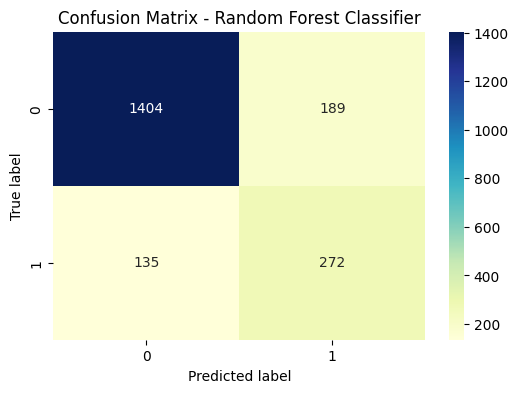

In [ ]:
print("Random Forest Report:")
print(classification_report(y_test, y_predicted_rfc))
print("Random Forest Confusion Matrix:")
cm_rfc = confusion_matrix(y_test, y_predicted_rfc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='YlGnBu', linewidths=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

**For improved Random Forest Classifier**
*   Overall Accuracy: 84%, slightly lower than before (86%) — a reasonable trade-off for better churner detection.
*   Non-Churners:
  *   Precision: 0.91 → Most predicted non-churners are correct.
  *   Recall: 0.88 → Correctly identifies 88% of loyal customers.
*   Churners (Class 1):
  *   Precision: 0.59 → 59% of predicted churners actually churn.
  *   Recall: 0.67 → Major improvement over previous model (0.44) and logistic regression (0.19).
*   Only 135 churners are missed, compared to 228 previously — this is a meaningful improvement in recall.









# Feature importance analysis

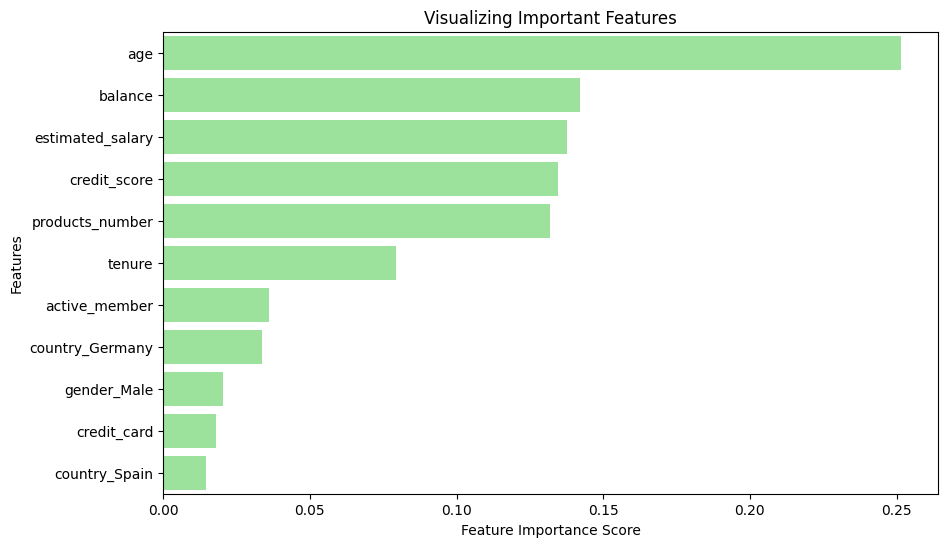

In [ ]:
feat_importances = pd.Series(best_rfc_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.sort_values(ascending=False),
            y=feat_importances.sort_values(ascending=False).index, color='#90EE90')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

*   Age is the dominant feature — older customers require tailored retention strategies.
*   Financial indicators like balance, salary, and credit score are highly predictive — understanding these can help identify valuable but at-risk customers.
*   Product engagement matters — customers with more products and higher activity are less likely to leave.
*   Demographic features (gender and some country) are least impactful, suggesting behavior and financial status are more critical than demographics.
*   Overall, the model is largely driven by financial activity and customer lifecycle, not static demographics





# Conclusion:
*   The final model achieved:
  *   Accuracy: ~84%
  *   Precision (Class 1 – Churn): 0.59
  *   Recall (Class 1 – Churn): 0.67

The model demonstrates strong ability to correctly identify churners, which is crucial for proactive retention strategies.

*   Key insights include:
  *   Age is the most influential factor, with older customers more likely to churn.
  *   High-balance and high-salary customers are valuable but at greater churn risk.
  *  Churn rates vary depending on the type of product a customer holds. Certain products (e.g., Product 2 or Product 3) are associated with higher churn, while others (e.g., Product 1 or Product 4) have relatively lower churn rates.
*   Demographics like gender have minimal impact, while location plays a small but notable role.


*   Business impact:

By focusing on high-value customers with low engagement—particularly older individuals concentrated in specific product types—the bank can significantly lower churn and safeguard long-term revenue.

Recommended strategies include:
* Personalized offers tailored to customer needs.
* Premium service packages for high-balance and high-salary clients.
* Cross-selling opportunities to encourage multi-product adoption.
* Targeted engagement programs (e.g., loyalty rewards, digital usage incentives) to improve retention.




